## =>Here we are importing the necessary library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## => Here we have imported the file from my local Device

In [3]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

## => now We only need class column for our output, so distrubuting the class.

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

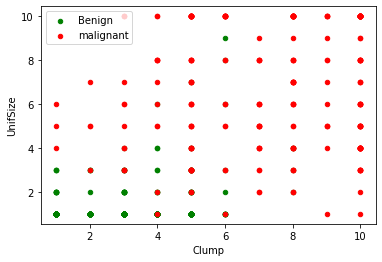

In [4]:
benign_df = cell_df[cell_df['Class']==2][0:300]
malignant_df = cell_df[cell_df['Class']==4][0:300]

benign_axes = benign_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize',color = 'green', label = 'Benign')
malignant_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'red', label = 'malignant', ax = benign_axes)

## =>Here we try to find the unwanted data rows and try to convert them in numeric data types

In [5]:
cell_df.dtypes #here we know BareNuc is of object datatype

#here the Barenum is converted into numeric type and all the nonnull are stored in the barenuc of cell_df
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int') #here we converted the numerci data into int datatype

cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## =>Here we are removing the unwanted columns from the data set

In [7]:
cell_df.columns #creating a new df for independent columns

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#independent Var
x = np.asarray(feature_df)
#dependent var
y = np.asarray(cell_df['Class'])

y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

## => Here we split the dataset into test and train type

In [37]:
'''
training dataset will be 80%
test dataset will be 20%
'''

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=4)

x_train.shape#(546,9)
y_train.shape#(546,1)
x_test.shape#(137,9)
y_test.shape#(137,1)

(137, 9)

## => Here we import the SVM package form sklearn lib.

In [42]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C=2)
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)

## => Here we evaluate the results from prevision test data set

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

